In [19]:
import PF_IMP_og as imp 
import numpy as np
import matplotlib.pyplot as plt

In [37]:
structure = imp.load_pdb('stateH+babel.pdb')

hbonds = imp.find_hydrogen_bonds(structure)
contacts = imp.count_heavy_atom_contacts_sigmoid(structure, k = 1, distance_threshold = 6.5, d0=0)
pf = imp.estimate_protection_factors(hbonds, contacts)

#create a diction where the key is residue.id[1] and the value is the protection factor 
#pf[residue][2] is the protection factor
#residue.id[1] is the residue number
pf_dict_H = {}
for residue in pf.keys():
    residue_number = residue.id[1]
    pf_dict_H[residue_number] = pf[residue][2]

import pandas as pd
df_H = pd.DataFrame.from_dict(pf_dict_H, orient='index')
df_H.reset_index(inplace=True)
df_H.columns = ['res_num', 'pf_h']



In [21]:
hbonds

[(<Residue PRO het=  resseq=3 icode= >,
  <Atom O>,
  <Residue ARG het=  resseq=5 icode= >,
  <Atom N>),
 (<Residue ARG het=  resseq=5 icode= >,
  <Atom O>,
  <Residue THR het=  resseq=7 icode= >,
  <Atom N>),
 (<Residue ALA het=  resseq=8 icode= >,
  <Atom N>,
  <Residue VAL het=  resseq=39 icode= >,
  <Atom O>),
 (<Residue ALA het=  resseq=8 icode= >,
  <Atom O>,
  <Residue ALA het=  resseq=41 icode= >,
  <Atom N>),
 (<Residue VAL het=  resseq=9 icode= >,
  <Atom N>,
  <Residue LEU het=  resseq=69 icode= >,
  <Atom O>),
 (<Residue VAL het=  resseq=9 icode= >,
  <Atom O>,
  <Residue VAL het=  resseq=68 icode= >,
  <Atom N>),
 (<Residue LEU het=  resseq=10 icode= >,
  <Atom N>,
  <Residue ALA het=  resseq=41 icode= >,
  <Atom O>),
 (<Residue LEU het=  resseq=10 icode= >,
  <Atom O>,
  <Residue LYS het=  resseq=43 icode= >,
  <Atom N>),
 (<Residue LYS het=  resseq=11 icode= >,
  <Atom N>,
  <Residue ALA het=  resseq=66 icode= >,
  <Atom O>),
 (<Residue LYS het=  resseq=11 icode= >,
  <A

In [38]:
structureU = imp.load_pdb('prep_stateU.pdb')


hbonds_u = imp.find_hydrogen_bonds(structureU)
contacts_u = imp.count_heavy_atom_contacts_sigmoid(structureU, distance_threshold=6.5, k=1, d0=0)
pf_u = imp.estimate_protection_factors(hbonds_u, contacts_u)




In [24]:
pf_u

{<Residue MET het=  resseq=1 icode= >: (0, 0, 0.0),
 <Residue ALA het=  resseq=2 icode= >: (0,
  1.9999947881516242,
  0.6999981758530684),
 <Residue PRO het=  resseq=3 icode= >: (1, 0, 2.0),
 <Residue LEU het=  resseq=4 icode= >: (1, 0, 2.0),
 <Residue ARG het=  resseq=5 icode= >: (2,
  3.999979406697409,
  5.399992792344093),
 <Residue LYS het=  resseq=6 icode= >: (1,
  10.999791860903857,
  5.84992715131635),
 <Residue THR het=  resseq=7 icode= >: (1,
  13.99892680175882,
  6.899624380615586),
 <Residue ALA het=  resseq=8 icode= >: (2,
  29.997653746923866,
  14.499178811423352),
 <Residue VAL het=  resseq=9 icode= >: (2,
  27.995699788226382,
  13.798494925879233),
 <Residue LEU het=  resseq=10 icode= >: (2,
  35.99767408570963,
  16.59918592999837),
 <Residue LYS het=  resseq=11 icode= >: (2,
  26.998430206723157,
  13.449450572353104),
 <Residue LEU het=  resseq=12 icode= >: (2,
  33.99853320463163,
  15.899486621621069),
 <Residue TYR het=  resseq=13 icode= >: (2,
  27.998626777

In [25]:

full_dict = {}
for residue in pf.keys():
    residue_number = residue.id[1]
    full_dict[residue_number] = pf[residue]
    
full_dict_u = {}
for residue in pf_u.keys():
    residue_number = residue.id[1]
    full_dict_u[residue_number] = pf_u[residue]


In [26]:
contacts_u

{<Residue MET het=  resseq=1 icode= >: 0,
 <Residue ALA het=  resseq=2 icode= >: 1.9999947881516242,
 <Residue PRO het=  resseq=3 icode= >: 0,
 <Residue LEU het=  resseq=4 icode= >: 0,
 <Residue ARG het=  resseq=5 icode= >: 3.999979406697409,
 <Residue LYS het=  resseq=6 icode= >: 10.999791860903857,
 <Residue THR het=  resseq=7 icode= >: 13.99892680175882,
 <Residue ALA het=  resseq=8 icode= >: 29.997653746923866,
 <Residue VAL het=  resseq=9 icode= >: 27.995699788226382,
 <Residue LEU het=  resseq=10 icode= >: 35.99767408570963,
 <Residue LYS het=  resseq=11 icode= >: 26.998430206723157,
 <Residue LEU het=  resseq=12 icode= >: 33.99853320463163,
 <Residue TYR het=  resseq=13 icode= >: 27.998626777428935,
 <Residue VAL het=  resseq=14 icode= >: 34.99723639119302,
 <Residue ALA het=  resseq=15 icode= >: 30.99851346112687,
 <Residue GLY het=  resseq=16 icode= >: 11.998206793695765,
 <Residue ASN het=  resseq=17 icode= >: 6.999657965718457,
 <Residue THR het=  resseq=18 icode= >: 16.9956

In [8]:
print("in H:", full_dict[85], "in U:", full_dict_u[85]) 

in H: (4, 18.996925521606734, 14.648923932562356) in U: (2, 13.993369811499297, 8.897679434024754)


In [39]:
structure = imp.load_pdb('prep_stateU.pdb')

hbonds = imp.find_hydrogen_bonds(structure)
contacts = imp.count_heavy_atom_contacts_sigmoid(structure, k = 1, distance_threshold = 6.5, d0=0)
pf = imp.estimate_protection_factors(hbonds, contacts)

#create a diction where the key is residue.id[1] and the value is the protection factor 
#pf[residue][2] is the protection factor
#residue.id[1] is the residue number
pf_dict_U= {}
for residue in pf.keys():
    residue_number = residue.id[1]
    pf_dict_U[residue_number] = pf[residue][2]

#turn this into a dataframe where columns are the residue number and protection factor but don't make the residue number the index
import pandas as pd
df_U = pd.DataFrame.from_dict(pf_dict_U, orient='index')
df_U.reset_index(inplace=True)
df_U.columns = ['res_num', 'pf_u']



In [40]:
#merge the two dataframes on residue number
df = pd.merge(df_H, df_U, on='res_num')
#calculate the difference in protection factor
df['pf_diff'] = df['pf_h'] - df['pf_u']


In [41]:
sequence = 'MAPLRKTAVLKLYVAGNTPNSVRALKTLNNILEKEFKGVYALKVIDVLKNPQLAEEDKILATPTLAKVLPPPVRRIIGDLSNREKVLIALRLLAEEIGD'
#create a new column that is the amino acid for each residue number
df['aa'] = [sequence[i-1] for i in df['res_num']]

In [42]:
#drop rows with proliness
df = df[df['aa'] != 'P']
#drop rows with glycines
# df = df[df['aa'] != 'G']

In [43]:
df

,res_num,pf_h,pf_u,pf_diff,aa
0,1,0.000000,0.000000,0.000000,M
1,2,0.698507,0.698874,-0.000367,A
3,4,0.000000,2.000000,-2.000000,L
4,5,5.396408,5.396946,-0.000538,R
5,6,4.523030,5.836129,-1.313099,K
...,...,...,...,...,...
94,95,6.534405,5.483378,1.051028,E
95,96,16.080207,13.995429,2.084777,E
96,97,10.960384,10.259955,0.700429,I
97,98,6.085236,6.084950,0.000286,G


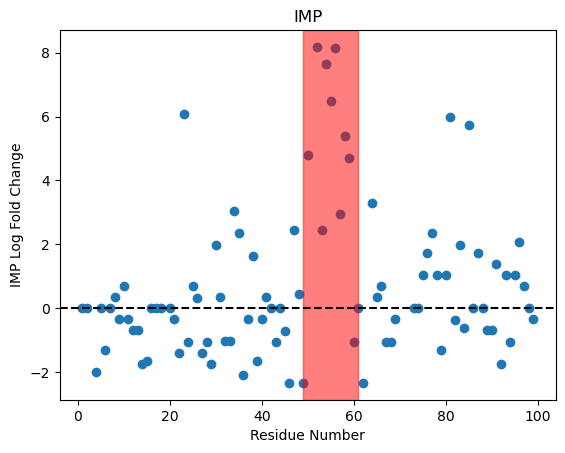

In [44]:
#make a scatter plot of the protection factors by residue number
plt.scatter(df['res_num'], df['pf_diff'])

plt.xlabel('Residue Number')
plt.ylabel('IMP Log Fold Change')
plt.title ("IMP")

#color between residues 49 and 61
plt.axvspan(49, 61, color='red', alpha=0.5)

#horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')
#save fig
plt.savefig('imp_resnum.png', dpi = 600)

#add x and y labels and the pearson correlation coefficient to the plot 


/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_14739/2201846341.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  state1_forrest = pd.read_csv(state1_forrest, delim_whitespace=True)
/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_14739/2201846341.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)


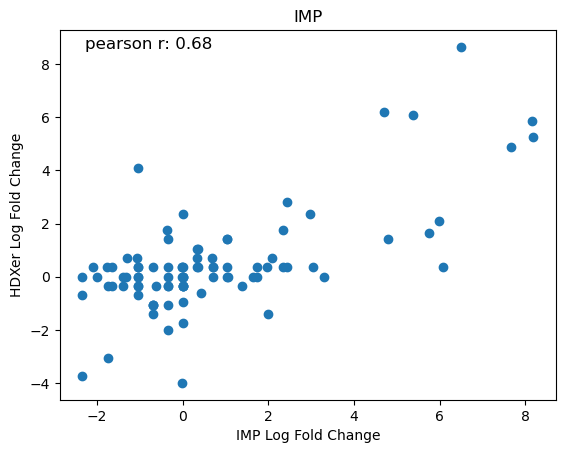

In [45]:
#read in hdxer data
state1_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateU_logPF.dat'
state2_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateH_logPF.dat'

state1_forrest = pd.read_csv(state1_forrest, delim_whitespace=True)
state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)

state1_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s1'}, inplace=True)
state1_forrest

#drop all columns except for the res_num and hxder_pf
state1_forrest = state1_forrest[['res_num', 'hxder_log_pf_s1']]

#add 1 to the res_num column
state1_forrest['res_num'] = state1_forrest['res_num'] + 1

#state2
state2_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s2'}, inplace=True)
state2_forrest = state2_forrest[['res_num', 'hxder_log_pf_s2']]

#add 1 to the res_num column
state2_forrest['res_num'] = state2_forrest['res_num'] + 1

#merge the two dataframes
merged_forrest = pd.merge(state1_forrest, state2_forrest, on='res_num')
#calculate the difference in protection factors
merged_forrest['hdxer_diff'] = merged_forrest['hxder_log_pf_s2'] - merged_forrest['hxder_log_pf_s1']
merged_forrest

#merge the two dataframes
merged = pd.merge(df, merged_forrest, on='res_num')
merged

#plot the difference in protection factors
plt.scatter(merged['pf_diff'], merged['hdxer_diff'])
#calculate the corelation coefficient
merged['pf_diff'].corr(merged['hdxer_diff'])

plt.xlabel('IMP Log Fold Change')
plt.ylabel('HDXer Log Fold Change')
#mvoe the text to the top left corner
plt.text(0.05, 0.95, f'pearson r: {merged["pf_diff"].corr(merged["hdxer_diff"]):.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.title ("IMP")
plt.savefig('imp_logfoldchange.png', dpi = 600)


In [34]:
state1_forrest

,res_num,hxder_log_pf_s1
0,2,0.00
1,4,0.00
2,5,0.70
3,6,3.15
4,7,3.85
...,...,...
86,95,7.95
87,96,7.25
88,97,7.95
89,98,6.55


In [35]:
merged.query("pf_diff > 0 & hdxer_diff < 0")

,res_num,pf_h,pf_u,pf_diff,aa,hxder_log_pf_s1,hxder_log_pf_s2,hdxer_diff
4,7,6.899625,6.899624,7.831439e-07,T,3.85,3.50,-0.35
13,16,8.199407,8.199372,3.477056e-05,G,9.00,8.65,-0.35
26,30,13.349576,11.349700,1.999876e+00,N,9.70,8.30,-1.40
38,42,4.899829,4.899772,5.762881e-05,L,4.90,4.55,-0.35
44,48,6.899886,6.449958,4.499276e-01,L,5.85,5.25,-0.60
77,86,13.549271,13.549209,6.187826e-05,V,11.45,10.50,-0.95
82,91,11.949783,10.549884,1.399899e+00,R,9.00,8.65,-0.35


<Figure size 1000x500 with 0 Axes>

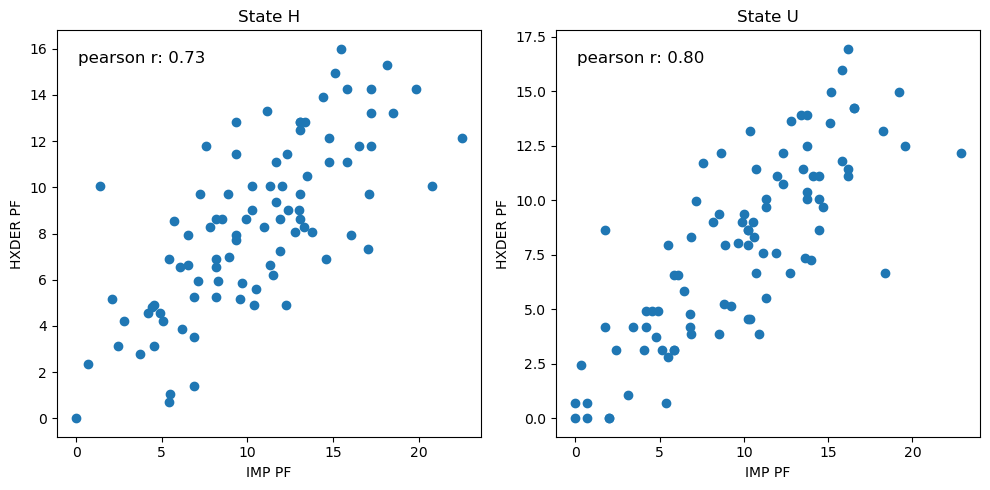

In [46]:
plt.figure(figsize=(10, 5))  # Adjust the figure size to be wider
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

# Plot for State H
axs[0].scatter(merged['pf_h'], merged['hxder_log_pf_s2'])
axs[0].set_title('State H')
axs[0].set_xlabel('IMP PF')
axs[0].set_ylabel('HXDER PF')

# Plot for State U
axs[1].scatter(merged['pf_u'], merged['hxder_log_pf_s1'])
axs[1].set_title('State U')
axs[1].set_xlabel('IMP PF')
axs[1].set_ylabel('HXDER PF')

axs[0].text(0.05, 0.95, f'pearson r: {merged["pf_h"].corr(merged["hxder_log_pf_s2"]):.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.05, 0.95, f'pearson r: {merged["pf_u"].corr(merged["hxder_log_pf_s1"]):.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')

# Adjust layout for better spacing
plt.tight_layout()

# save the plot
plt.savefig('IMP_vs_HDXER.png', dpi = 600)

# Show the plot
plt.show()



In [18]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')
# takes in a pdb and calcualtes the correlation coefficient between the IMP and HDXer data
def calculate_correlation(pdb, k = 1, distance_threshold = 6.5, d0=2.5):
    structure = imp.load_pdb(pdb)
    hbonds = imp.find_hydrogen_bonds(structure)
    contacts = imp.count_heavy_atom_contacts_sigmoid(structure, k = k, distance_threshold = distance_threshold, d0=d0)
    pf = imp.estimate_protection_factors(hbonds, contacts)
    pf_dict = {}
    for residue in pf.keys():
        residue_number = residue.id[1]
        pf_dict[residue_number] = pf[residue][2]
    df = pd.DataFrame.from_dict(pf_dict, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['res_num', 'pf_h']
    sequence = 'MAPLRKTAVLKLYVAGNTPNSVRALKTLNNILEKEFKGVYALKVIDVLKNPQLAEEDKILATPTLAKVLPPPVRRIIGDLSNREKVLIALRLLAEEIGD'
    df['aa'] = [sequence[i-1] for i in df['res_num']]
    df = df[df['aa'] != 'P']
    df = df[df['aa'] != 'G']
    state1_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateU_logPF.dat'
    state2_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateH_logPF.dat'
    state1_forrest = pd.read_csv(state1_forrest, delim_whitespace=True)
    state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)
    state1_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s1'}, inplace=True)
    state1_forrest = state1_forrest[['res_num', 'hxder_log_pf_s1']]
    state1_forrest['res_num'] = state1_forrest['res_num'] + 1
    state2_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s2'}, inplace=True)
    state2_forrest = state2_forrest[['res_num', 'hxder_log_pf_s2']]
    state2_forrest['res_num'] = state2_forrest['res_num'] + 1
    merged_forrest = pd.merge(state1_forrest, state2_forrest, on='res_num')
    merged_forrest['hdxer_diff'] = merged_forrest['hxder_log_pf_s2'] - merged_forrest['hxder_log_pf_s1']
    merged = pd.merge(df, merged_forrest, on='res_num')
    return merged['pf_h'].corr(merged['hxder_log_pf_s2'])

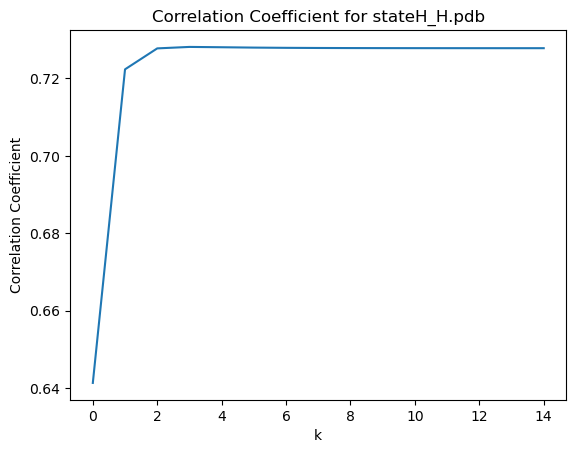

In [22]:
import matplotlib.pyplot as plt

# Calculate the correlation coefficient for the stateH_H.pdb for k between 0 and 10 and plot it
correlation = []
for i in range(15):
    correlation.append(calculate_correlation('stateH_H_new.pdb', k=i))

# Plot the correlation coefficients
plt.plot(range(15), correlation)
plt.xlabel('k')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient for stateH_H.pdb')
plt.show()


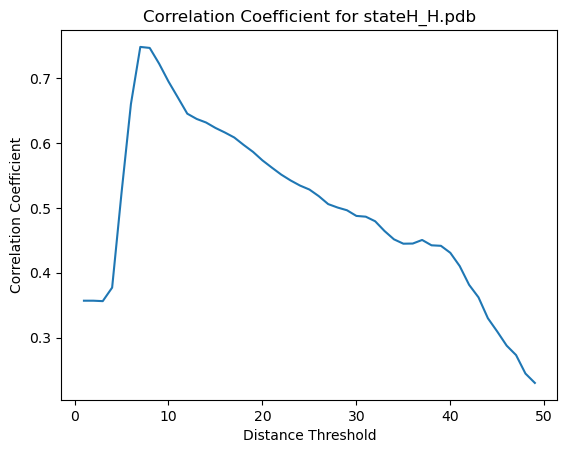

In [23]:
# Calculate the correlation coefficient for the stateU_H.pdb for distance_threshold between 1 and 10 and plot it
correlation = []
for i in range(1, 50):
    correlation.append(calculate_correlation('stateH_H_new.pdb', distance_threshold=i))
# Plot the correlation coefficients
plt.plot(range(1,50), correlation)
plt.xlabel('Distance Threshold')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient for stateH_H.pdb')
plt.show()


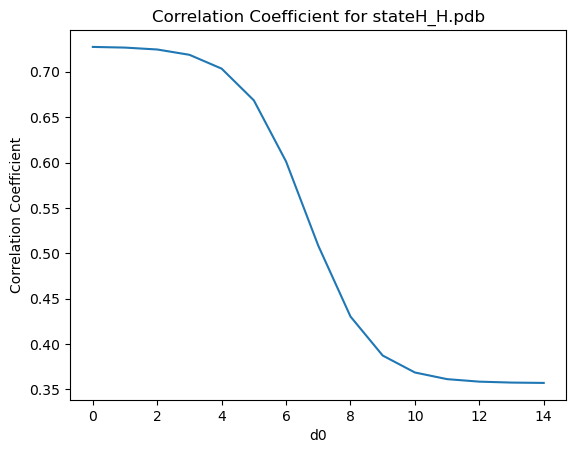

In [113]:
#calcualte the correlation coefficient for the stateH_H.pdb for d0 between 0 and 10 and plot it
correlation = []
for i in range(15):
    correlation.append(calculate_correlation('stateH_H_new.pdb', d0=i))
# Plot the correlation coefficients
plt.plot(range(15), correlation)
plt.xlabel('d0')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient for stateH_H.pdb')
plt.show()

In [3]:
# #generate a D plot k on the x-axis and distance_threshold on the y-axis and the correlation coefficient as the color
# correlation = np.zeros((15, 15))
# for i in range(1, 15):
#     for j in range(1, 15):
#         correlation[i, j] = calculate_correlation('stateH_H.pdb', k=i, distance_threshold=j)
# plt.imshow(correlation, origin='lower')
# plt.colorbar()
# plt.xlabel('k')
# plt.ylabel('Distance Threshold')
# plt.title('Correlation Coefficient for stateH_H.pdb')